<a href="https://colab.research.google.com/github/AhadChowdhury12/Data-Migration---SQLite-to-Neo4J/blob/main/Data_Science_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Merged dataset saved to 'C:\Users\akash\Downloads\merged_crime_data.csv'


In [1]:
import pandas as pd

# URLs for datasets
url1 = "https://data.nt.gov.au/dataset/49c1f50f-41d1-462c-a96e-006f76131aaf/resource/4421b317-bf45-40f0-acaa-f338a432be42/download/nt_crime_statistics_nov_2023.csv"  # November 2023 data
url2 = "https://data.nt.gov.au/dataset/bdf23e49-e093-456c-bc22-0f94c9ffc8f3/resource/e70d682f-9855-488a-8311-28c1c2d28c0c/download/nt_crime_statistics_jul_2024.csv"  # July 2024 data

# Load both datasets
data_nov_2023 = pd.read_csv(url1)
data_july_2024 = pd.read_csv(url2)

# Concatenate the datasets with 2023 first, then 2024
merged_data = pd.concat([data_nov_2023, data_july_2024])

# Save the merged dataset
merged_data.to_csv('merged_crime_data.csv', index=False)

print("Datasets merged with November 2023 first and saved as 'merged_crime_data.csv'")


Datasets merged with November 2023 first and saved as 'merged_crime_data.csv'


In [ ]:
import pandas as pd
data = pd.read_csv('merged_crime_data.csv')
data.head()


,As At,Year,Month number,Offence category,Offence type,Alcohol involvement,DV involvement,Reporting region,Statistical Area 2,Number of offences
0,3/01/2024,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Alice Springs,NaN,1
1,3/01/2024,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,NT Balance,Alligator,1
2,3/01/2024,2008,1,Abduction - harassment and other offences agai...,Deprivation of liberty /false imprisonment,-,-,Tennant Creek,NaN,1
3,3/01/2024,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Alligator,2
4,3/01/2024,2008,1,Abduction - harassment and other offences agai...,Harassment and private nuisance,-,-,NT Balance,Daly,1


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('merged_crime_data.csv')

# Fill NaN values in 'Statistical Area 2' with a placeholder (e.g., 'Unknown')
# data['Statistical Area 2'] = data['Statistical Area 2'].fillna('Unknown')

# Optionally, you can drop rows with missing values
# data = data.dropna()
# Drop the 'As At' column as it's not needed
data = data.drop(columns=['As At', 'Statistical Area 2' ])

# Save the cleaned data
data.to_csv('cleaned_crime_data.csv', index=False)

print("Missing values handled and data saved as 'cleaned_crime_data.csv'")


Missing values handled and data saved as 'cleaned_crime_data.csv'


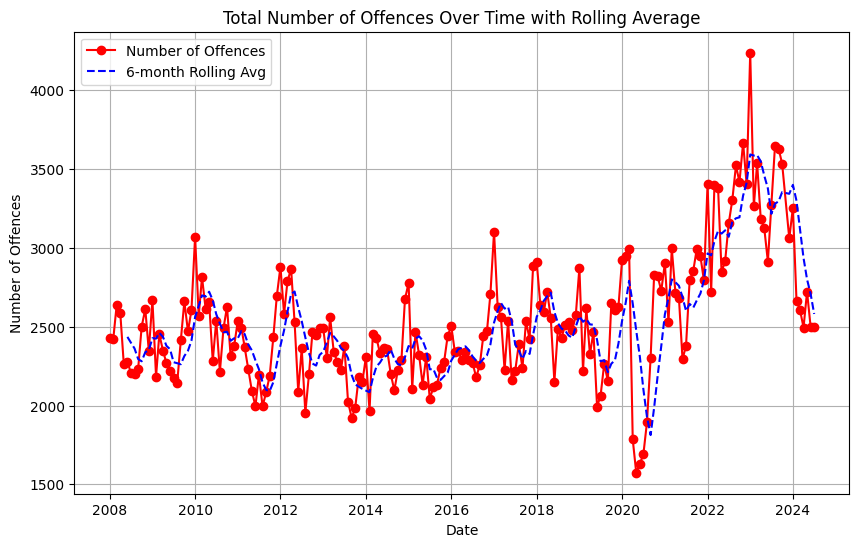

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset (not encoded)
data = pd.read_csv('cleaned_crime_data.csv')

# Create a 'Date' column using 'Year' and 'Month number'
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month number'].astype(str) + '-01')

# Group by 'Date' and sum the 'Number of offences' for each month
offences_by_date = data.groupby('Date')['Number of offences'].sum().reset_index()

# Calculate the rolling average (e.g., 6-month rolling average)
offences_by_date['6-month Rolling Avg'] = offences_by_date['Number of offences'].rolling(window=6).mean()

# Plot the total number of offences over time
plt.figure(figsize=(10, 6))
plt.plot(offences_by_date['Date'], offences_by_date['Number of offences'], color='red', marker='o', label='Number of Offences')
plt.plot(offences_by_date['Date'], offences_by_date['6-month Rolling Avg'], color='blue', linestyle='--', label='6-month Rolling Avg')
plt.title('Total Number of Offences Over Time with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.legend()
plt.show()


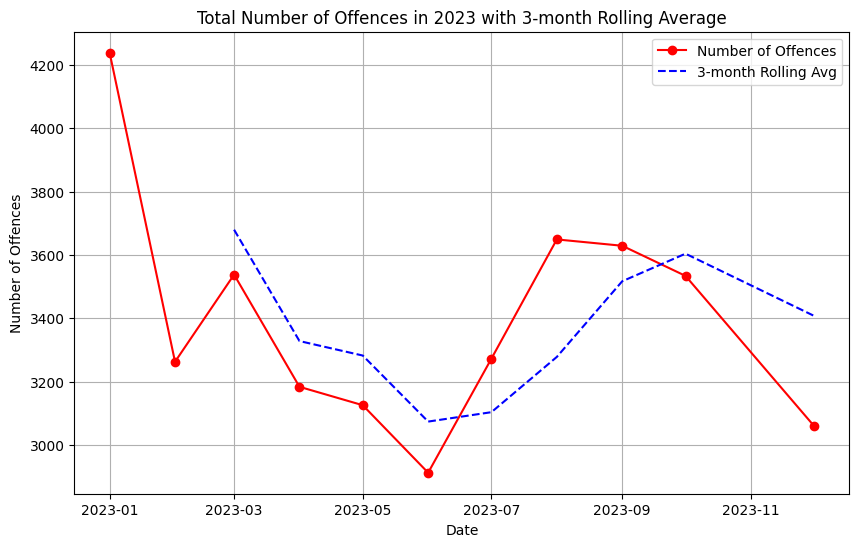

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
data = pd.read_csv('cleaned_crime_data.csv')

# Create a 'Date' column using 'Year' and 'Month number'
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month number'].astype(str) + '-01')

# Filter data for the year 2023
data_2023 = data[data['Year'] == 2023]

# Group by 'Date' and sum the 'Number of offences' for each month in 2023
offences_by_date_2023 = data_2023.groupby('Date')['Number of offences'].sum().reset_index()

# Calculate the 3-month rolling average for the year 2023
offences_by_date_2023['3-month Rolling Avg'] = offences_by_date_2023['Number of offences'].rolling(window=3).mean()

# Plot the total number of offences for 2023 and rolling average
plt.figure(figsize=(10, 6))
plt.plot(offences_by_date_2023['Date'], offences_by_date_2023['Number of offences'], color='red', marker='o', label='Number of Offences')
plt.plot(offences_by_date_2023['Date'], offences_by_date_2023['3-month Rolling Avg'], color='blue', linestyle='--', label='3-month Rolling Avg')
plt.title('Total Number of Offences in 2023 with 3-month Rolling Average')
plt.xlabel('Date')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_crime_data.csv')

# Create 'Involvement rating' column
def calculate_involvement(row):
    if row['Alcohol involvement'] == 'Yes' and row['DV involvement'] == 'Yes':
        return 2
    elif row['Alcohol involvement'] == 'Yes' or row['DV involvement'] == 'Yes':
        return 1
    else:
        return 0

data['Involvement rating'] = data.apply(calculate_involvement, axis=1)

# Drop the 'Alcohol involvement', 'DV involvement', and 'Statistical Area 2' columns
data = data.drop(columns=['Alcohol involvement', 'DV involvement', 'Statistical Area 2'])

# Save the updated dataset
data.to_csv('cleaned_crime_data_updated.csv', index=False)

print("Involvement rating column created and 'Statistical Area 2' removed.")


Involvement rating column created and 'Statistical Area 2' removed.


In [5]:
# One hot coding
import pandas as pd

# Load the dataset
data = pd.read_csv('cleaned_crime_data_updated.csv')

# Apply One-Hot Encoding to all text columns that need to be converted
# This includes 'Offence category', 'Offence type', 'Reporting region', etc.
data_encoded = pd.get_dummies(data, columns=['Offence category', 'Offence type', 'Reporting region'], drop_first=True)

# Save the encoded data
data_encoded.to_csv('cleaned_crime_data_encoded.csv', index=False)

# Display the first few rows of the encoded data
# print(data_encoded.head())

# Convert boolean values to integers (0 and 1)
data_encoded = data_encoded.astype(int)

# Save the updated dataset
data_encoded.to_csv('cleaned_crime_data_encoded_final.csv', index=False)

# Display the first few rows to confirm the conversion
# print(data_encoded.head())


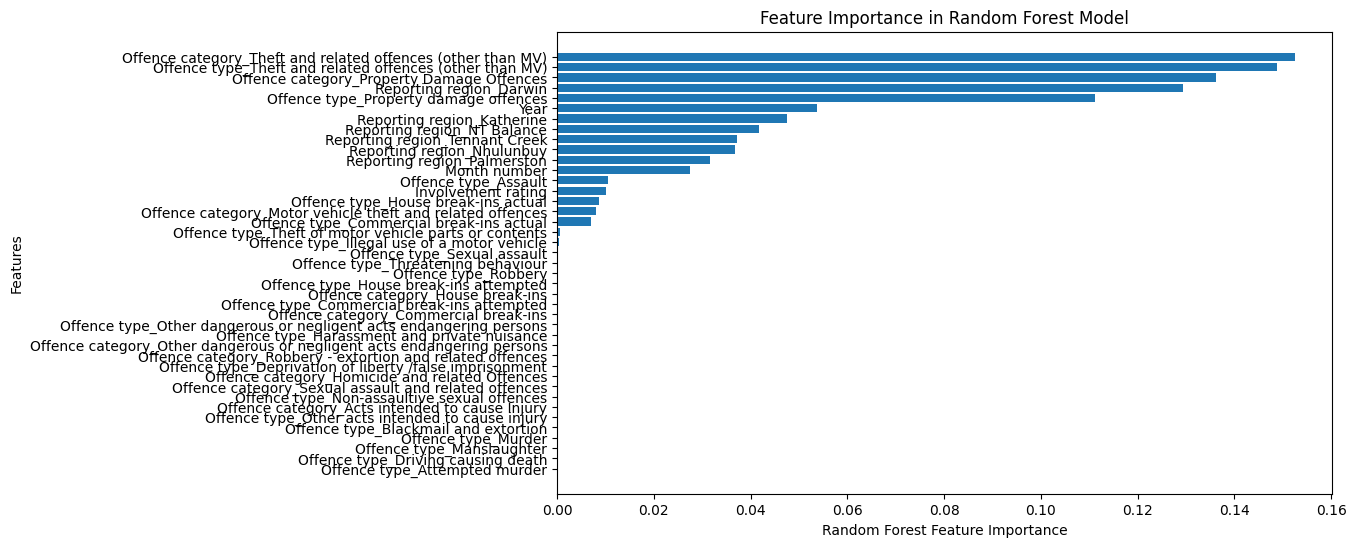

In [7]:
import matplotlib.pyplot as plt

# Check feature importance
feature_importances = model.feature_importances_
sorted_idx = feature_importances.argsort()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the dataset
data = pd.read_csv('cleaned_crime_data_encoded_final.csv')

# List of important features (including Previous month offences)
important_features = [
    'Year', 'Month number',
    'Offence category_Theft and related offences (other than MV)',
    'Offence category_Property Damage Offences',
    'Offence type_Theft and related offences (other than MV)',
    'Offence type_Property damage offences',
    'Reporting region_Darwin',
    'Reporting region_Katherine',
    'Reporting region_NT Balance',
    'Reporting region_Tennant Creek',
    'Reporting region_Nhulunbuy',
    'Reporting region_Palmerston',
    'Previous month offences'  # Include this in both training and future data
]

# Add a lag feature (previous month's offences) to the dataset
data['Previous month offences'] = data.groupby('Year')['Number of offences'].shift(1)
data['Previous month offences'] = data['Previous month offences'].fillna(0)

# Define features (including lag feature) and target
X = data[important_features]
y = data['Number of offences']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Train XGBoost model
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1,
    'n_estimators': 100
}
xg_model = xgb.train(params, train_dmatrix, num_boost_round=100)

# Prepare future data (August to December 2024) with Previous month offences
future_data = pd.DataFrame({
    'Year': [2024]*5,
    'Month number': [8, 9, 10, 11, 12],
    'Offence category_Theft and related offences (other than MV)': [0]*5,
    'Offence category_Property Damage Offences': [0]*5,
    'Offence type_Theft and related offences (other than MV)': [0]*5,
    'Offence type_Property damage offences': [0]*5,
    'Reporting region_Darwin': [0]*5,
    'Reporting region_Katherine': [0]*5,
    'Reporting region_NT Balance': [1]*5,
    'Reporting region_Tennant Creek': [0]*5,
    'Reporting region_Nhulunbuy': [0]*5,
    'Reporting region_Palmerston': [0]*5,
    'Previous month offences': [100, 120, 110, 105, 115]  # Example values for previous months' offences
})

# Convert future data to DMatrix for XGBoost
future_dmatrix = xgb.DMatrix(future_data)

# Predict for future months using XGBoost
future_predictions = xg_model.predict(future_dmatrix)

# Summarize the monthly predictions
monthly_predictions = pd.DataFrame({
    'Month number': [8, 9, 10, 11, 12],
    'Predicted offences': future_predictions.round()  # Round to whole numbers
})

# Display the summarized predictions
print(monthly_predictions)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:02:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


   Month number  Predicted offences
0             8                20.0
1             9                23.0
2            10                23.0
3            11                22.0
4            12                23.0


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset
data = pd.read_csv('cleaned_crime_data_encoded_final.csv')

# List of important features (including Previous month offences)
important_features = [
    'Year', 'Month number',
    'Offence category_Theft and related offences (other than MV)',
    'Offence category_Property Damage Offences',
    'Offence type_Theft and related offences (other than MV)',
    'Offence type_Property damage offences',
    'Reporting region_Darwin',
    'Reporting region_Katherine',
    'Reporting region_NT Balance',
    'Reporting region_Tennant Creek',
    'Reporting region_Nhulunbuy',
    'Reporting region_Palmerston',
    'Previous month offences'
]

# Add a lag feature (previous month's offences) to the dataset
data['Previous month offences'] = data.groupby('Year')['Number of offences'].shift(1)
data['Previous month offences'] = data['Previous month offences'].fillna(0)

# Normalize 'Previous month offences'
scaler = MinMaxScaler()
data[['Previous month offences']] = scaler.fit_transform(data[['Previous month offences']])

# Define features and target
X = data[important_features]
y = data['Number of offences']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert dataset to DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Train XGBoost model
params = {
    'objective': 'reg:squarederror',
    'max_depth': 5,
    'eta': 0.1
}
xg_model = xgb.train(params, train_dmatrix, num_boost_round=100)

# Prepare future data for different combinations of regions, offence types, etc.
previous_month_offences = np.random.choice([100, 120, 110, 105, 115], size=40)  # Adjusted size to include month 12
scaled_previous_offences = scaler.transform(previous_month_offences.reshape(-1, 1)).flatten()

future_data_combinations = pd.DataFrame({
    'Year': [2024]*40,  # Simulating 40 combinations (including month 12)
    'Month number': [8]*10 + [9]*10 + [10]*5 + [11]*5 + [12]*10,  # Including month 12
    'Offence category_Theft and related offences (other than MV)': [0]*40,
    'Offence category_Property Damage Offences': [1]*20 + [0]*20,
    'Offence type_Theft and related offences (other than MV)': [0]*40,
    'Offence type_Property damage offences': [1]*20 + [0]*20,
    'Reporting region_Darwin': [0]*40,
    'Reporting region_Katherine': [1]*10 + [0]*30,
    'Reporting region_NT Balance': [0]*40,
    'Reporting region_Tennant Creek': [0]*40,
    'Reporting region_Nhulunbuy': [0]*40,
    'Reporting region_Palmerston': [1]*10 + [0]*30,
    'Previous month offences': scaled_previous_offences  # Scaled and flattened array
})

# Convert future data to DMatrix for XGBoost
future_dmatrix = xgb.DMatrix(future_data_combinations)

# Predict for future months using XGBoost
future_predictions = xg_model.predict(future_dmatrix)

# Add predictions to the future data
future_data_combinations['Predicted offences'] = future_predictions

# Summarize the predictions by month
monthly_predictions = future_data_combinations.groupby('Month number')['Predicted offences'].sum().reset_index()
monthly_predictions['Predicted offences'] = monthly_predictions['Predicted offences'].round()

# Display the summarized predictions for each month, including month 12
print(monthly_predictions)


   Month number  Predicted offences
0             8               394.0
1             9               402.0
2            10               125.0
3            11               126.0
4            12               245.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set
test_predictions = xg_model.predict(test_dmatrix)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

# Print the evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


RMSE: 9.950272390221414
MAE: 4.714186009381126
R² Score: 0.8817226886749268


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('cleaned_crime_data_encoded_final.csv')

# List of important features (including Previous month offences)
important_features = [
    'Year', 'Month number',
    'Offence category_Theft and related offences (other than MV)',
    'Offence category_Property Damage Offences',
    'Offence type_Theft and related offences (other than MV)',
    'Offence type_Property damage offences',
    'Reporting region_Darwin',
    'Reporting region_Katherine',
    'Reporting region_NT Balance',
    'Reporting region_Tennant Creek',
    'Reporting region_Nhulunbuy',
    'Reporting region_Palmerston',
    'Previous month offences'
]

# Add a lag feature (previous month's offences) to the dataset
data['Previous month offences'] = data.groupby('Year')['Number of offences'].shift(1)
data['Previous month offences'] = data['Previous month offences'].fillna(0)

# Normalize 'Previous month offences'
scaler = MinMaxScaler()
data[['Previous month offences']] = scaler.fit_transform(data[['Previous month offences']])

# Define features and target
X = data[important_features]
y = data['Number of offences']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train, y_train)

# Predict on the test set
test_predictions = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

# Print evaluation metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")

# Hypothesis interpretation:
# If RMSE is low and R² is high, the hypothesis that crime can be predicted using this dataset is supported.


RMSE: 9.950272390221414
MAE: 4.714186009381126
R² Score: 0.8817226886749268


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
test_predictions = xg_model.predict(test_dmatrix)

# Evaluate the model
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, test_predictions)
r2 = r2_score(y_test, test_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")



RMSE: 9.950272390221414
MAE: 4.714186009381126
R² Score: 0.8817226886749268


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import numpy as np

# Load the cleaned dataset
data = pd.read_csv('cleaned_crime_data.csv')

# Convert categorical variables into numerical values using LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to categorical columns
data['Offence category'] = label_encoder.fit_transform(data['Offence category'])
data['Offence type'] = label_encoder.fit_transform(data['Offence type'])
data['Alcohol involvement'] = label_encoder.fit_transform(data['Alcohol involvement'].astype(str))  # Convert '-' to strings
data['DV involvement'] = label_encoder.fit_transform(data['DV involvement'].astype(str))
data['Reporting region'] = label_encoder.fit_transform(data['Reporting region'])
data['Statistical Area 2'] = label_encoder.fit_transform(data['Statistical Area 2'])

# Define features and target
X = data.drop(columns=['Number of offences'])
y = data['Number of offences']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Model ###
# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict using Random Forest
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Evaluation:")
print(f"RMSE: {rf_rmse}")
print(f"MAE: {rf_mae}")
print(f"R² Score: {rf_r2}")

### XGBoost Model ###
# Convert dataset to DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
xgb_params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 5,
    'eta': 0.1
}

# Train XGBoost
xg_model = xgb.train(xgb_params, train_dmatrix, num_boost_round=100)

# Predict using XGBoost
xgb_predictions = xg_model.predict(test_dmatrix)

# Evaluate XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBoost Evaluation:")
print(f"RMSE: {xgb_rmse}")
print(f"MAE: {xgb_mae}")
print(f"R² Score: {xgb_r2}")

### Compare Results ###
print("\nComparison Summary:")
print(f"Random Forest - RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}")
print(f"XGBoost - RMSE: {xgb_rmse}, MAE: {xgb_mae}, R²: {xgb_r2}")


Random Forest Evaluation:
RMSE: 6.580339550237371
MAE: 2.8478696376509784
R² Score: 0.9482717220204123

XGBoost Evaluation:
RMSE: 7.567069335636448
MAE: 3.394463800279176
R² Score: 0.9315951466560364

Comparison Summary:
Random Forest - RMSE: 6.580339550237371, MAE: 2.8478696376509784, R²: 0.9482717220204123
XGBoost - RMSE: 7.567069335636448, MAE: 3.394463800279176, R²: 0.9315951466560364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48020 entries, 0 to 48019
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   As At                48020 non-null  object
 1   Year                 48020 non-null  int64 
 2   Month number         48020 non-null  int64 
 3   Offence category     48020 non-null  object
 4   Offence type         48020 non-null  object
 5   Alcohol involvement  48020 non-null  object
 6   DV involvement       48020 non-null  object
 7   Reporting region     48020 non-null  object
 8   Statistical Area 2   30659 non-null  object
 9   Number of offences   48020 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.7+ MB
None
       As At  Year  Month number  \
0  3/01/2024  2008             1   
1  3/01/2024  2008             1   
2  3/01/2024  2008             1   
3  3/01/2024  2008             1   
4  3/01/2024  2008             1   

                               

<ipython-input-17-314d5d658237>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Offence category', data=data, palette='Set2')


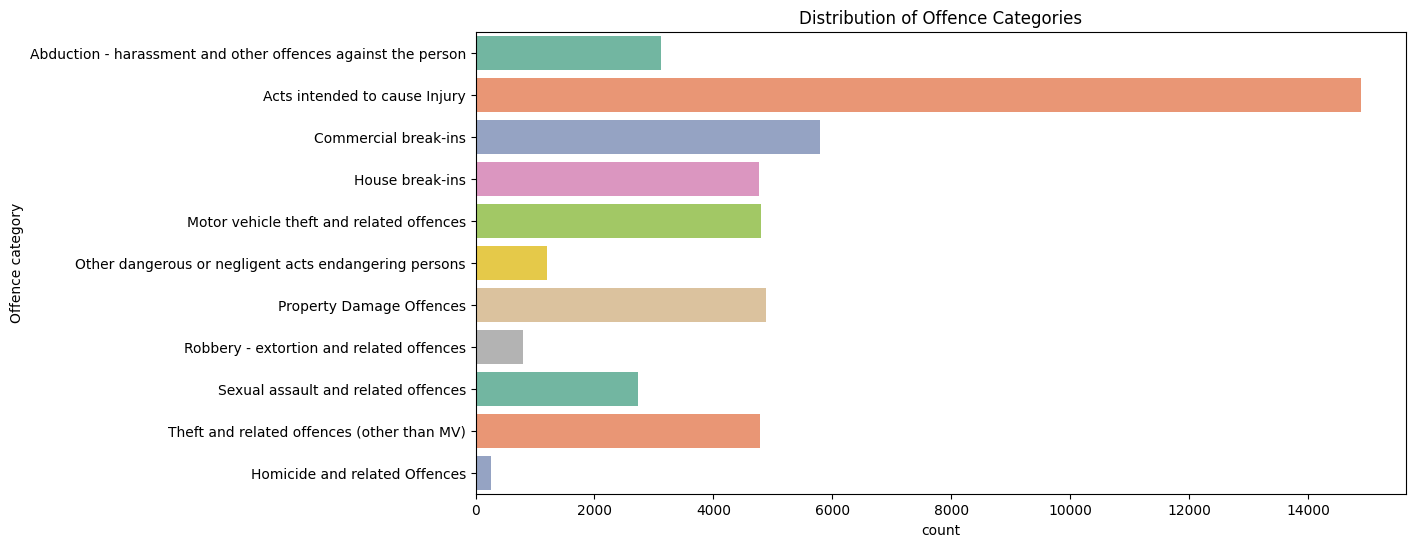

<ipython-input-17-314d5d658237>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Alcohol involvement', data=data, palette='Set1')


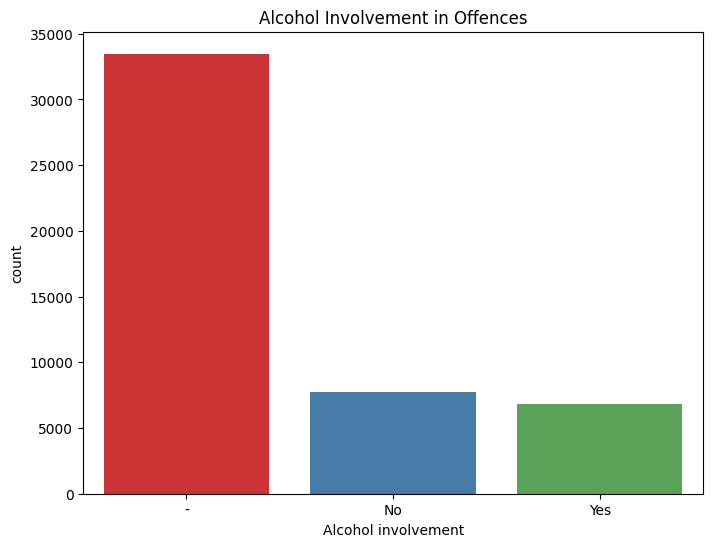

<ipython-input-17-314d5d658237>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Reporting region', data=data, palette='Set3')


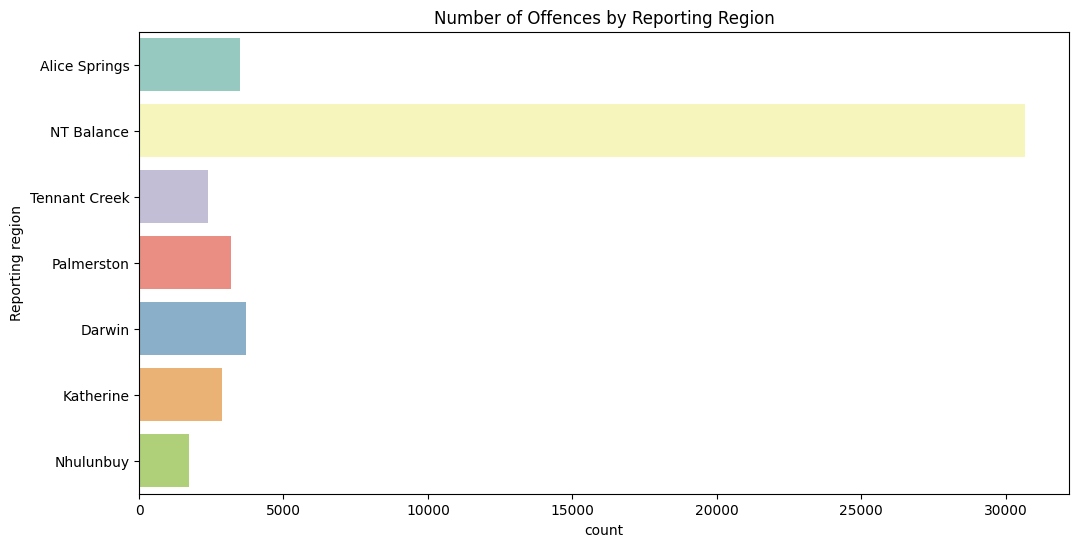

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original dataset
data = pd.read_csv('merged_crime_data.csv')

# Quick overview of the data
print(data.info())
print(data.head())

# Visualize Offence Categories
plt.figure(figsize=(12, 6))
sns.countplot(y='Offence category', data=data, palette='Set2')
plt.title('Distribution of Offence Categories')
plt.show()

# Analyze Alcohol involvement
plt.figure(figsize=(8, 6))
sns.countplot(x='Alcohol involvement', data=data, palette='Set1')
plt.title('Alcohol Involvement in Offences')
plt.show()

# Number of offences by Reporting region
plt.figure(figsize=(12, 6))
sns.countplot(y='Reporting region', data=data, palette='Set3')
plt.title('Number of Offences by Reporting Region')
plt.show()


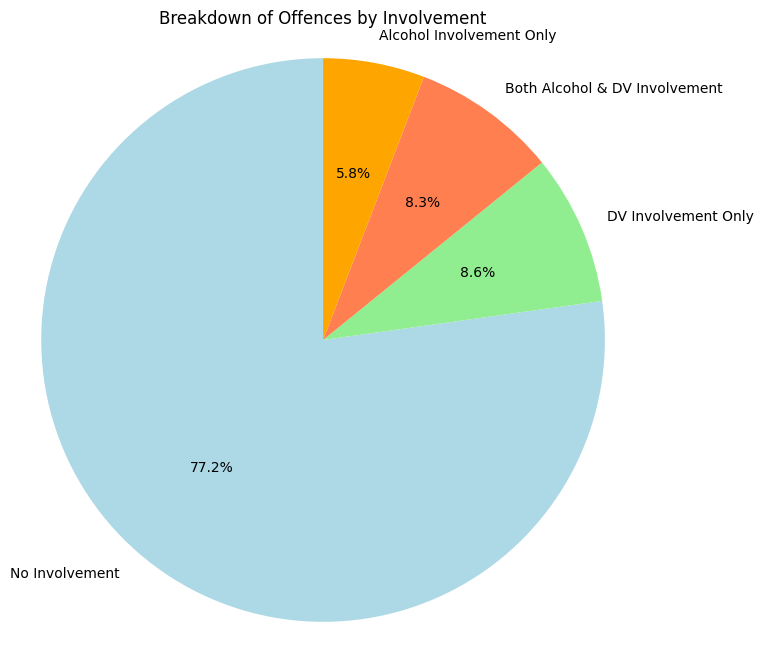

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('cleaned_crime_data.csv')

# Define a function to categorize involvement
def categorize_involvement(row):
    if row['Alcohol involvement'] == 'Yes' and row['DV involvement'] == 'Yes':
        return 'Both Alcohol & DV Involvement'
    elif row['Alcohol involvement'] == 'Yes':
        return 'Alcohol Involvement Only'
    elif row['DV involvement'] == 'Yes':
        return 'DV Involvement Only'
    else:
        return 'No Involvement'

# Apply the function to create a new column for involvement category
data['Involvement Category'] = data.apply(categorize_involvement, axis=1)

# Count the occurrences of each category
involvement_counts = data['Involvement Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(involvement_counts, labels=involvement_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral', 'orange'], startangle=90)
plt.title('Breakdown of Offences by Involvement')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()



In [34]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/cleaned_crime_data.csv')

# Apply One-Hot Encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['Offence category', 'Offence type', 'Reporting region'], drop_first=True)

# Replace 'Yes'/'No' with 1/0 for boolean-like columns (e.g., Alcohol involvement, DV involvement)
# Assuming these columns are present in the data
if 'Alcohol involvement' in data_encoded.columns:
    data_encoded['Alcohol involvement'] = data_encoded['Alcohol involvement'].map({'Yes': 1, 'No': 0, '-': np.nan})
if 'DV involvement' in data_encoded.columns:
    data_encoded['DV involvement'] = data_encoded['DV involvement'].map({'Yes': 1, 'No': 0, '-': np.nan})

# Replace non-numeric values ('-') with NaN or 0
data_encoded.replace('-', np.nan, inplace=True)

# Optionally fill NaN values with 0
data_encoded.fillna(0, inplace=True)

# Convert to integers
data_encoded = data_encoded.astype(int)

# Save the updated dataset
data_encoded.to_csv('cleaned_crime_data_encoded_final_new.csv', index=False)

# Display the first few rows to confirm the conversion
# print(data_encoded.head())


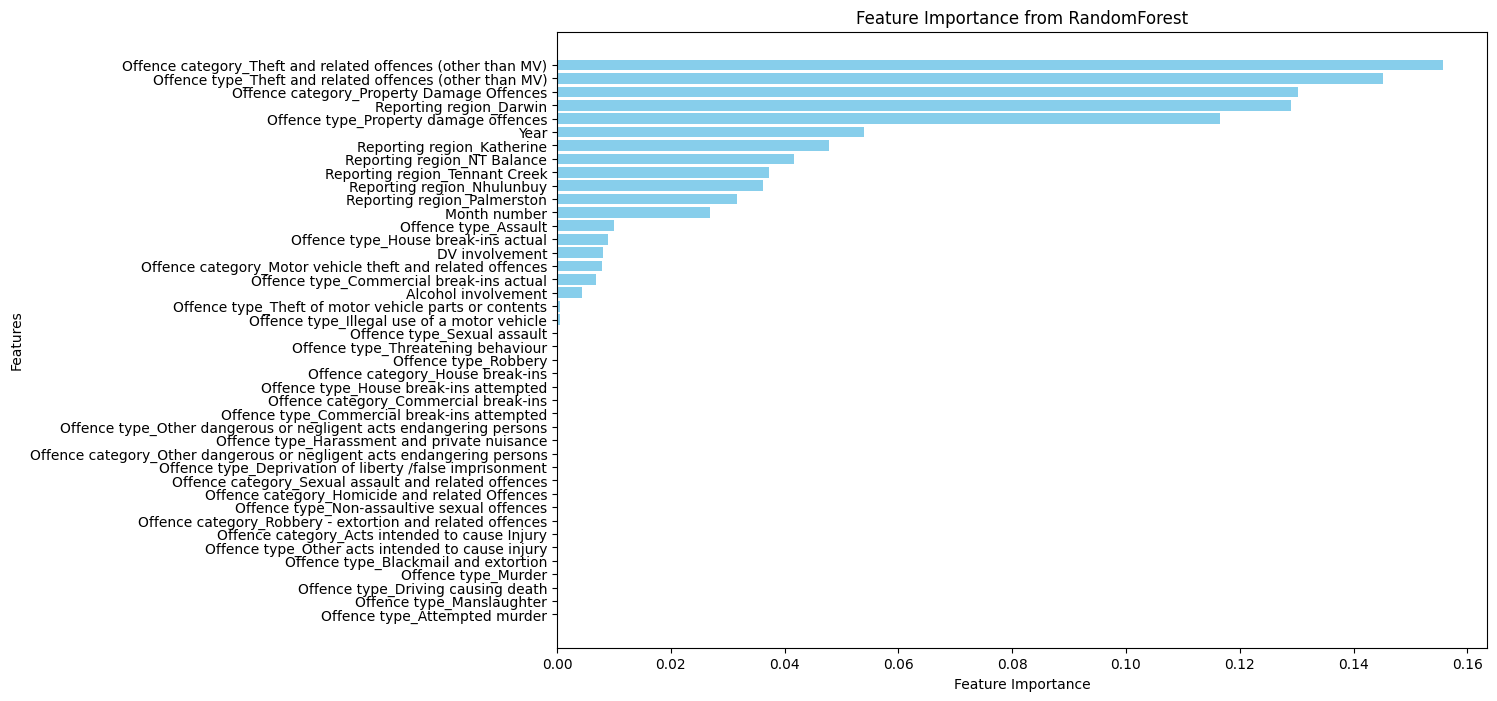

                                              Feature    Importance
13  Offence category_Theft and related offences (o...  1.556709e-01
33  Offence type_Theft and related offences (other...  1.451434e-01
10          Offence category_Property Damage Offences  1.302559e-01
36                            Reporting region_Darwin  1.290843e-01
30              Offence type_Property damage offences  1.165117e-01
0                                                Year  5.393366e-02
37                         Reporting region_Katherine  4.777245e-02
38                        Reporting region_NT Balance  4.157872e-02
41                     Reporting region_Tennant Creek  3.727171e-02
39                         Reporting region_Nhulunbuy  3.628510e-02
40                        Reporting region_Palmerston  3.165047e-02
1                                        Month number  2.695897e-02
14                               Offence type_Assault  1.008958e-02
22                Offence type_House break-ins a

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset (after encoding)
data = pd.read_csv('cleaned_crime_data_encoded_final_new.csv')

# Define the features (X) and the target (y)
X = data.drop(columns=['Number of offences'])  # Replace 'Number of offences' with the target column name
y = data['Number of offences']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance from the model
feature_importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis()
plt.show()

# Display the sorted feature importance DataFrame
print(feature_importance_df)


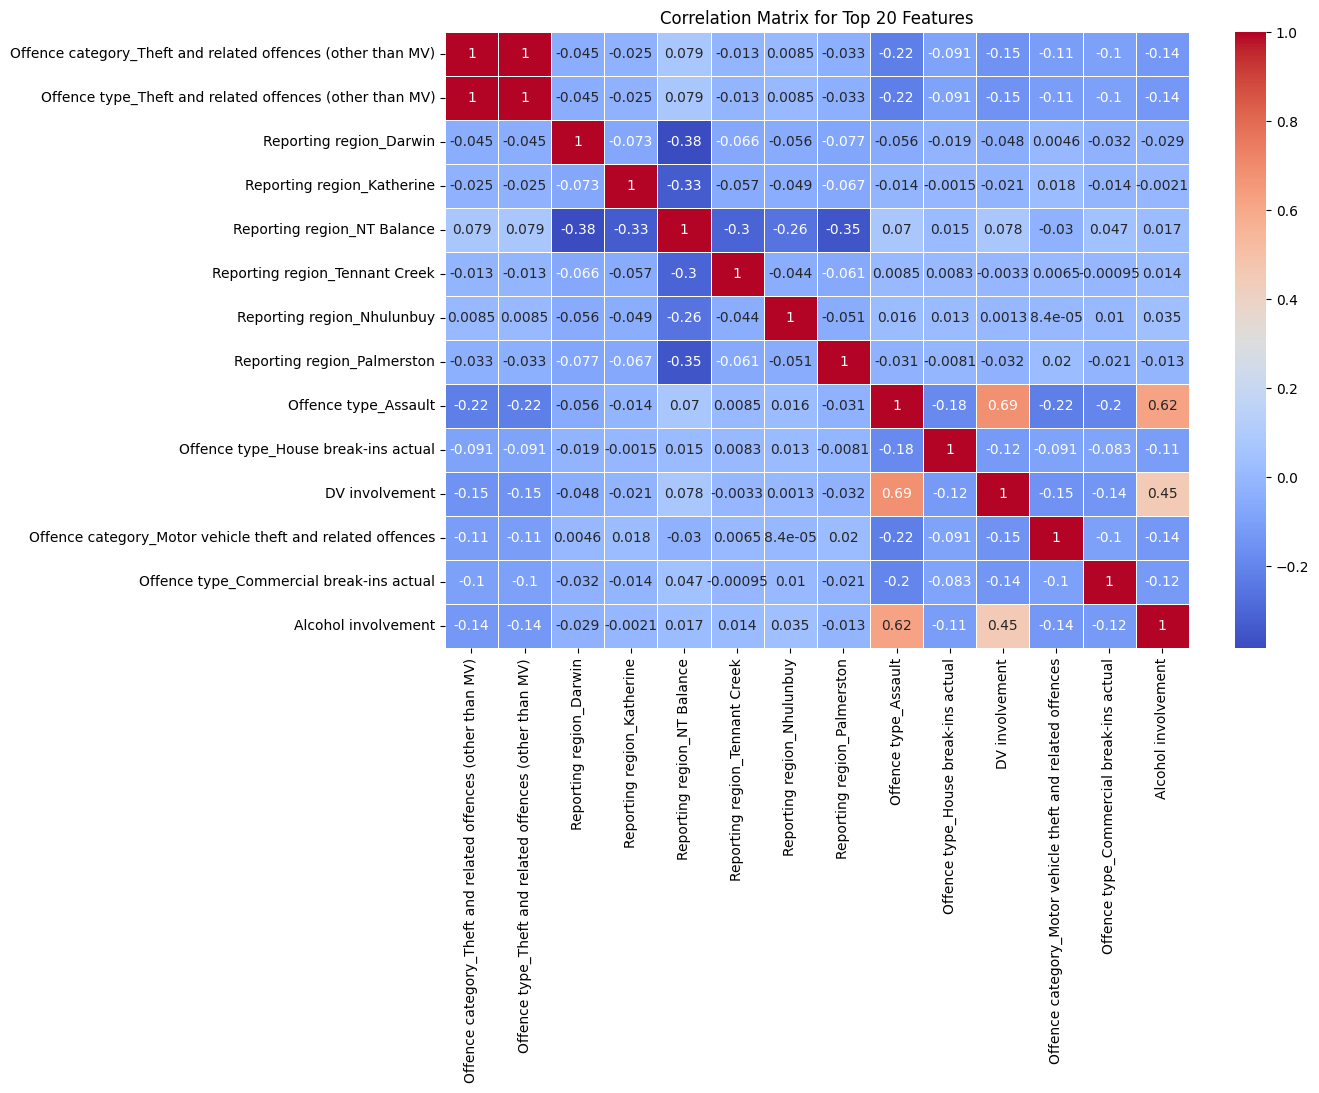

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cleaned_crime_data_encoded_final_new.csv')

# List of the top 20 important features
top_20_features = [
    'Offence category_Theft and related offences (other than MV)',
    'Offence type_Theft and related offences (other than MV)',
    # 'Offence category_Property Damage Offences',
    'Reporting region_Darwin',
    # 'Offence type_Property damage offences',
    # 'Year',
    'Reporting region_Katherine',
    'Reporting region_NT Balance',
    'Reporting region_Tennant Creek',
    'Reporting region_Nhulunbuy',
    'Reporting region_Palmerston',
    # 'Month number',
    'Offence type_Assault',
    'Offence type_House break-ins actual',
    'DV involvement',
    'Offence category_Motor vehicle theft and related offences',
    'Offence type_Commercial break-ins actual',
    'Alcohol involvement',
    # 'Offence type_Theft of motor vehicle parts or contents',
    # 'Offence type_Illegal use of a motor vehicle'
]

# Filter the dataset to keep only the top 20 features
filtered_data = data[top_20_features]

# Generate the correlation matrix
corr_matrix = filtered_data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Top 20 Features')
plt.show()


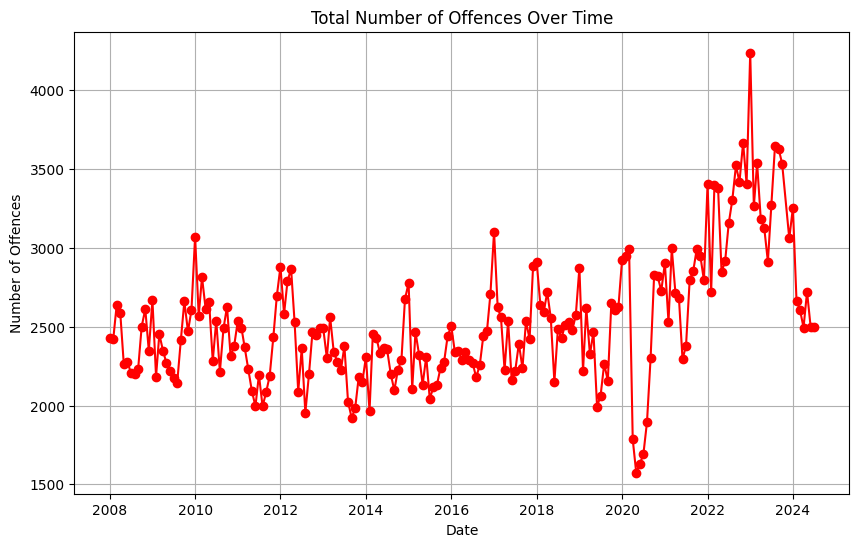

In [41]:
# Line plot of offences by year and month
data = pd.read_csv('cleaned_crime_data.csv')
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month number'].astype(str) + '-01')

# Group by Date
offences_by_date = data.groupby('Date')['Number of offences'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(offences_by_date['Date'], offences_by_date['Number of offences'], color='red', marker='o')
plt.title('Total Number of Offences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.show()


<ipython-input-42-48702f97330b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month number', y='Number of offences', data=data, palette='coolwarm')


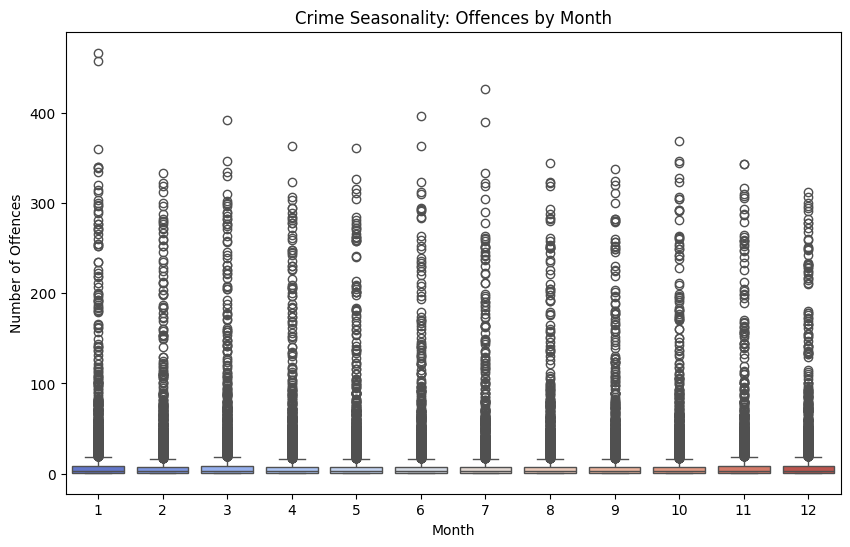

In [42]:
# Offences by Month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month number', y='Number of offences', data=data, palette='coolwarm')
plt.title('Crime Seasonality: Offences by Month')
plt.xlabel('Month')
plt.ylabel('Number of Offences')
plt.show()


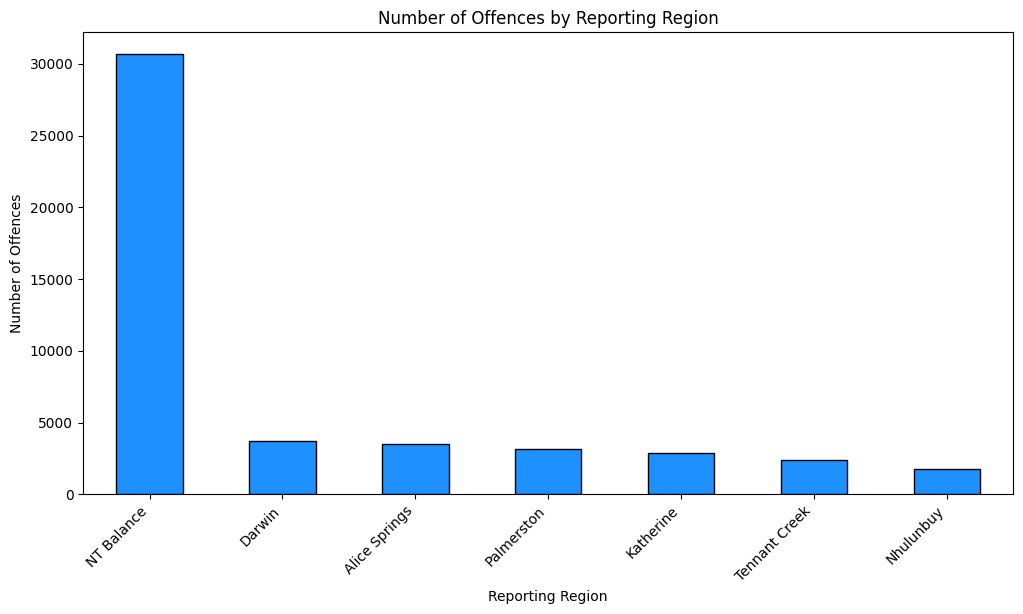

In [44]:
# Bar plot for Reporting Regions
reporting_region_counts = data['Reporting region'].value_counts()

plt.figure(figsize=(12, 6))
reporting_region_counts.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.title('Number of Offences by Reporting Region')
plt.xlabel('Reporting Region')
plt.ylabel('Number of Offences')
plt.xticks(rotation=45, ha='right')
plt.show()


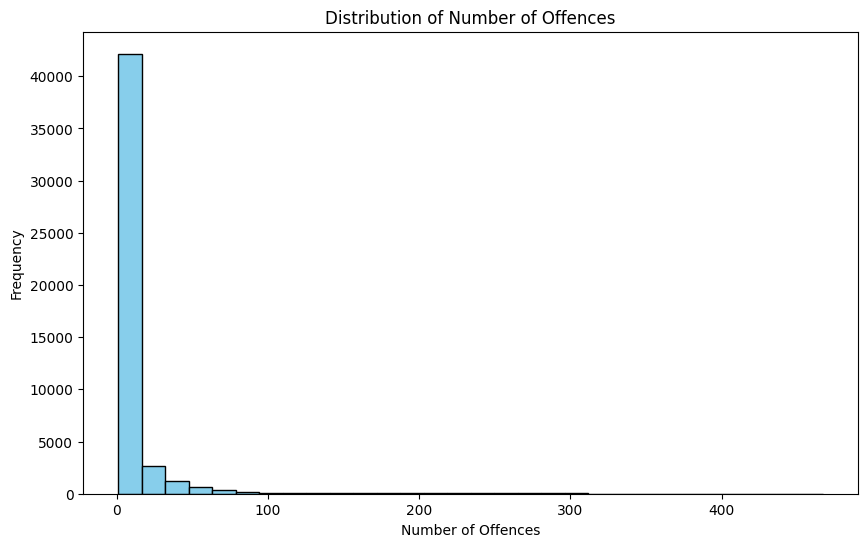

In [45]:
import matplotlib.pyplot as plt

# Plot histogram of 'Number of offences'
plt.figure(figsize=(10, 6))
plt.hist(data['Number of offences'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Offences')
plt.xlabel('Number of Offences')
plt.ylabel('Frequency')
plt.show()
